# Wrangle and Analyze

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents

- [Introduction](#intro)
    - [Data Gathering](#gather)
    - [Data Assessing](#asses)
    - [Data Cleaning](#clean)
- [Analyzing and Visualizing](#analyz)


<a id='intro'></a>

### Introduction

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user <a href="https://twitter.com/dog_rates">@dog_rates</a>, also known as <a href='https://en.wikipedia.org/wiki/WeRateDogs'>WeRateDogs.</a> WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because <a href="https://knowyourmeme.com/memes/theyre-good-dogs-brent">"they're good dogs Brent</a>." WeRateDogs has over 4 million followers and has received international media coverage.

>WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

 #### Import statements for all of the packages that will be used

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
import os
import re
import tweepy
import requests
% matplotlib inline

<a id='gather'></a>

### Data Gathering

After importing all the packages now the `twitter-archive-enhanced.csv` file should be imported is the csv file of tweet archived that was given to us from the Udacity from <a href="https://twitter.com/dog_rates">@dog_rates</a>, But this CSV file need to cleaning.

In [2]:
df_archive_tweet = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv');

In [3]:
df_archive_tweet.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Importing the `image-predictions.tsv` as requested to be downloaded programmatically from the URL, using the Requests library : https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv';
requests = requests.get(url)
with open(os.path.join(os.getcwd(), url.split('/')[-1]), mode = 'wb') as file:
    file.write(requests.content)

In [5]:
df_predict = pd.read_csv('image-predictions.tsv', sep='\t')
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The Twitter API the requests for the json text file is rejected i did upload to jupyter.

consumer_key = 'YOUR CONSUMER KEY'

consumer_secret = 'YOUR CONSUMER SECRET'

access_token = 'YOUR ACCESS TOKEN'

access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

 **Reading the JSON data from the txt file to extract tweet id, favorite count, and retweet count and put data to dataframe.**

In [6]:
#json file
tweet_id = []
tweet_fav = []
tweet_rt = []

with open('tweet_json.txt', mode = 'r') as file:
     for line in file.readlines():
            tweet = json.loads(line)
            tweet_id.append(tweet['id'])
            tweet_fav.append(tweet['favorite_count'])
            tweet_rt.append(tweet['retweet_count'])
            
df_tweet_data = pd.DataFrame({'tweet_id':tweet_id, 'favorite_count':tweet_fav, 'retweet_count':tweet_rt})

In [7]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


<a id='asses'></a>

### Data Assessing

1- `df_archive_tweet`

In [8]:
#the info method is used see some issues:
df_archive_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#the describe method is used see some issues:
df_archive_tweet.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#the sample method is used see other issues:
df_archive_tweet.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1608,685641971164143616,NaN,NaN,2016-01-09 01:59:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. He just passed a cop while going...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685641971...,7,10,Otis,None,None,pupper,None
977,750011400160841729,NaN,NaN,2016-07-04 17:00:26 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Piper. She's an airport doggo. Please ret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750011400...,11,10,Piper,doggo,None,None,None
220,850019790995546112,NaN,NaN,2017-04-06 16:18:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Boomer. He's a sandy pupper. Havi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer,None,None,pupper,None


In [11]:
#the unique method is used all unique names:
df_archive_tweet.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [12]:
# value_counts method is to see the most names and there counts:
df_archive_tweet.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
Toby          7
Daisy         7
Bailey        7
an            7
Stanley       6
Dave          6
Milo          6
Koda          6
Bella         6
Rusty         6
Scout         6
Jack          6
Oscar         6
Jax           6
Leo           6
Sammy         5
           ... 
Lulu          1
Vixen         1
Marvin        1
Pavlov        1
Grizz         1
Darby         1
Clarq         1
Terrenth      1
Linus         1
Brandy        1
Hero          1
Bruno         1
Marlee        1
Meera         1
Kaia          1
Bobb          1
Samsom        1
Leonidas      1
Rose          1
Jarod         1
Cecil         1
Ronduh        1
Staniel       1
Banjo         1
Bradlay       1
Nugget        1
Newt          1
Remus         1
Kramer        1
Mona          1
Name: name, Length: 957,

In [13]:
# value_counts method is used to see the sources and the counts:
df_archive_tweet.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

make sure there is no duplicated tweets or null tweets

In [14]:
# duplicated method is used to see duplicated rows of the DataFrame:
df_archive_tweet[df_archive_tweet.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
# isnull method is used to see null rows of the DataFrame:
df_archive_tweet[df_archive_tweet.tweet_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


there is no null or duplicateed tweets

2-`df_predict`

In [16]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
#the sample method is used see other issues:
df_predict.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1573,795400264262053889,https://pbs.twimg.com/media/CwnUUGTWIAE8sFR.jpg,2,golden_retriever,0.925494,True,Labrador_retriever,0.059241,True,tennis_ball,0.004495,False
750,687826841265172480,https://pbs.twimg.com/media/CYum3KbWEAArFrI.jpg,1,Pomeranian,0.997210,True,Pekinese,0.000803,True,keeshond,0.000373,True
2003,877201837425926144,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1,Pembroke,0.931120,True,Cardigan,0.068698,True,basenji,0.000082,True
1604,800388270626521089,https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg,2,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True
1052,714141408463036416,https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,1,Labrador_retriever,0.586951,True,golden_retriever,0.378812,True,redbone,0.003605,True


3- `df_tweet_data`

In [19]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [20]:
df_tweet_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [21]:
#the sample method is used see other issues:
df_tweet_data.sample(5)

,tweet_id,favorite_count,retweet_count
2171,669324657376567296,525,223
2180,668992363537309700,802,381
2186,668975677807423489,1386,641
782,775350846108426240,11309,4532
2295,667073648344346624,425,134


#### Tidiness Issues
- The `df_archive_tweet` dataframe the columns `doggo`, `floofer`, `pupper`, and `puppo` should all be one column.


- All the dataframe should be in one dataframe, the `df_tweet_data`, `df_predict`, and `df_archive_tweet` should be one datafram.


#### Quality Issues


- The `source` contexts should be easy to read.


- The `df_archive_tweet` dataframe contain of the wrong data, for the following columns: `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `timestamp`.


- In the `df_predict` and `df_tweet_data` dataframe the `tweet_id` wrong data type.


- The retweeted tweets and the replying on other tweet are not needed the needed are only The Original Ratings tweets. 


- The `names` for the dogs couldn't be. (a, the, an, ...) as in the table.


- In the `df_archive_tweet` some of tweets with rating less than 10 dose not have images.

<a id='clean'></a>

### Data Cleaning

In [22]:
#Createing dataframes copies to clean 

df_archive_tweet_clean = df_archive_tweet.copy()
df_predict_clean = df_predict.copy()
df_tweet_data_clean = df_tweet_data.copy()

### 1- Tidiness 

##### Define
1- Melt the columns `doggo`, `pupper`, `puppo`, and `floofer` into one colum. called `stage`

##### Code


In [23]:
df_archive_tweet_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [24]:
# Created a list of the original tweet ids to makes analyzing data much easier.
tweet_ids = df_archive_tweet_clean.tweet_id.tolist()

# Melt the columns doggo, pupper, puppo, and floofer to one column
df_archive_tweet_clean = pd.melt(df_archive_tweet_clean, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                       'retweeted_status_user_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
                                       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                        var_name = 'removed', value_name = 'stage')
df_archive_tweet_clean = df_archive_tweet_clean.drop('removed', axis = 1)

In [25]:
df_archive_tweet_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None


In [26]:
dog_stage = []
for id_1, tweetid in enumerate(tweet_ids):
    tweets = df_archive_tweet_clean[df_archive_tweet_clean.tweet_id == tweetid]
    
    
# if the stage is null and the tweet has a value or values the stages wil be set to the value.

    if tweets.stage.values.tolist()[0] != 'None':
        dog_stage = tweets[tweets.stage != 'None'].stage.values.tolist()
        df_archive_tweet_clean.loc[id_1, 'stage'] = ', '.join(dog_stage)
        df_archive_tweet_clean = df_archive_tweet_clean.drop(labels = tweets.index.values.tolist()[1:1], axis = 0)
        continue
        
    if tweets.stage.values.tolist()[1] != 'None':
        dog_stage = tweets[tweets.stage != 'None'].stage.values.tolist()
        df_archive_tweet_clean.loc[id_1, 'stage'] = ', '.join(dog_stage)
        df_archive_tweet_clean = df_archive_tweet_clean.drop(labels = tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    if tweets.stage.values.tolist()[2] != 'None':
        dog_stage = tweets[tweets.stage != 'None'].stage.values.tolist()
        df_archive_tweet_clean.loc[id_1, 'stage'] = ', '.join(dog_stage)
        df_archive_tweet_clean = df_archive_tweet_clean.drop(labels = tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    if tweets.stage.values.tolist()[3] != 'None':
        dog_stage = tweets[tweets.stage != 'None'].stage.values.tolist()
        df_archive_tweet_clean.loc[id_1, 'stage'] = ', '.join(dog_stage)
        df_archive_tweet_clean = df_archive_tweet_clean.drop(labels = tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    # if a tweet has no stage value of the four stages
    else: 
        df_archive_tweet_clean = df_archive_tweet_clean.drop(labels = tweets.index.values.tolist()[1:], axis = 0)

##### Test

In [27]:
df_archive_tweet_clean.stage.value_counts()

None              2253
pupper             257
doggo               83
puppo               30
doggo, pupper       12
floofer             10
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

##### Define

2- Merge the dataframes the `df_archive_tweet`, the `df_predict`, the `df_tweet_data` into one dataframe. with df_archive_tweet_clean 

##### Code


In [28]:
df_archive_tweet_clean = pd.merge(df_archive_tweet_clean , df_predict_clean, on = ['tweet_id'], how = 'inner')

In [29]:
df_archive_tweet_clean = pd.merge(df_archive_tweet_clean , df_tweet_data_clean, on = ['tweet_id'], how = 'inner')

##### Test

In [30]:
df_archive_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2313 entries, 0 to 2312
Data columns (total 27 columns):
tweet_id                      2313 non-null int64
in_reply_to_status_id         26 non-null float64
in_reply_to_user_id           26 non-null float64
retweeted_status_id           97 non-null float64
retweeted_status_user_id      97 non-null float64
timestamp                     2313 non-null object
source                        2313 non-null object
text                          2313 non-null object
retweeted_status_timestamp    97 non-null object
expanded_urls                 2313 non-null object
rating_numerator              2313 non-null int64
rating_denominator            2313 non-null int64
name                          2313 non-null object
stage                         2313 non-null object
jpg_url                       2313 non-null object
img_num                       2313 non-null int64
p1                            2313 non-null object
p1_conf                       2313 n

### 2- Quality 

- The `source` contexts should be easy to read.


- The `df_archive_tweet` dataframe contain of the wrong data, for the following columns: `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `timestamp`.


- The retweeted tweets and the replying on other tweet are not needed the needed are only The Original Ratings tweets. 


- The `names` for the dogs couldn't be. (a, the, an, ...) as in the table.


- In the `df_archive_tweet` some of tweets with rating less than 10 dose not have images.



#####  Define
The source contexts should be easy to read.

##### Code

In [31]:
df_archive_tweet_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2269
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      14
Name: source, dtype: int64

In [32]:
df_archive_tweet_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','IPhone Twitter', inplace = True)
df_archive_tweet_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Web Twitter', inplace = True)
df_archive_tweet_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweet Deck', inplace = True)

#### Test

In [33]:
df_archive_tweet_clean.source.value_counts()

IPhone Twitter    2269
Web Twitter         30
Tweet Deck          14
Name: source, dtype: int64

#####  Define

The `df_archive_tweet_clean` dataframe contain of the wrong data, for the following columns: `tweet_id`, `timestamp`.

The column will be removed so no need to convert them `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`.

##### Code

In [34]:
#converting date type of timestamp to datetime
df_archive_tweet_clean.timestamp = pd.to_datetime(df_archive_tweet_clean.timestamp)

#converting date type oftweet_id to string
df_archive_tweet_clean.tweet_id = df_archive_tweet_clean.tweet_id.astype('str')

##### Test

In [35]:
df_archive_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2313 entries, 0 to 2312
Data columns (total 27 columns):
tweet_id                      2313 non-null object
in_reply_to_status_id         26 non-null float64
in_reply_to_user_id           26 non-null float64
retweeted_status_id           97 non-null float64
retweeted_status_user_id      97 non-null float64
timestamp                     2313 non-null datetime64[ns]
source                        2313 non-null object
text                          2313 non-null object
retweeted_status_timestamp    97 non-null object
expanded_urls                 2313 non-null object
rating_numerator              2313 non-null int64
rating_denominator            2313 non-null int64
name                          2313 non-null object
stage                         2313 non-null object
jpg_url                       2313 non-null object
img_num                       2313 non-null int64
p1                            2313 non-null object
p1_conf                    

In [36]:
df_archive_tweet_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1553,688804835492233216,NaN,NaN,NaN,NaN,2016-01-17 19:27:24,IPhone Twitter,When you stumble but recover quickly cause you...,NaN,https://twitter.com/dog_rates/status/688804835...,...,0.199512,True,German_shepherd,0.096797,True,Saluki,0.082848,True,1043,227
640,794983741416415232,NaN,NaN,7.895309e+17,4.196984e+09,2016-11-05 19:24:28,IPhone Twitter,RT @dog_rates: This is Rizzy. She smiles a lot...,2016-10-21 18:16:44 +0000,https://twitter.com/dog_rates/status/789530877...,...,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True,0,3942
137,863432100342583297,NaN,NaN,NaN,NaN,2017-05-13 16:33:49,IPhone Twitter,This is Belle. She's never been more pupset. E...,NaN,https://twitter.com/dog_rates/status/863432100...,...,0.690517,True,French_bulldog,0.103360,True,beagle,0.079489,True,24829,5664
1270,712438159032893441,NaN,NaN,NaN,NaN,2016-03-23 00:37:48,IPhone Twitter,This is Kane. He's a semi-submerged Haitian Hu...,NaN,https://twitter.com/dog_rates/status/712438159...,...,0.869477,False,Great_Pyrenees,0.069457,True,Labrador_retriever,0.024740,True,5799,1756
350,829374341691346946,NaN,NaN,NaN,NaN,2017-02-08 17:00:26,IPhone Twitter,This is Astrid. She's a guide doggo in trainin...,NaN,https://twitter.com/dog_rates/status/829374341...,...,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True,38074,10706


##### Define

Fixing Lowercase names and if the name is as (a, an, the, this,...) or None, I did extract the names form the tweet text and if it is no proveded in it the the name will be null.

##### Code

In [37]:
for ids, name in enumerate(df_archive_tweet_clean.name):
   
    if name.islower() or name == 'None':
        word = re.compile('(?:named\s|name\sis\s)(\w+)')
        if word.findall(df_archive_tweet_clean.loc[ids,'text']):
            df_archive_tweet_clean.loc[ids,'name'] = word.findall(df_archive_tweet_clean.loc[ids,'text'])[0]
        else:
            df_archive_tweet_clean.loc[ids,'name'] = 'None'

##### Test

In [38]:
df_archive_tweet_clean.name.value_counts()

None         755
Bo            14
Charlie       11
Cooper        10
Loki          10
Sunny         10
Lucy          10
Penny         10
Oliver        10
Tucker        10
Scout          9
Sadie          8
Winston        8
Astrid         8
Lola           8
Toby           7
Daisy          7
Maggie         7
Cassie         7
Bailey         6
Dave           6
Stanley        6
Koda           6
Sampson        6
Jax            6
Kyle           6
Milo           6
Bella          6
Gerald         6
Rusty          6
            ... 
Joey           1
Pippin         1
Kulet          1
Cal            1
Ambrose        1
Sprinkles      1
Big            1
Billl          1
Kirk           1
Harrison       1
Noosh          1
Mo             1
Griswold       1
Crouton        1
Jaspers        1
Alfredo        1
Dewey          1
Gidget         1
Fido           1
Thor           1
Blue           1
Goose          1
Al             1
Spork          1
Chesney        1
Brian          1
Keurig         1
Damon         

##### Define
The retweeted tweets and the replying on other tweet are not needed the needed are only The Original Ratings tweets, so dropping the all columns linked with retweeting & replying. 

In [39]:
df_archive_tweet_clean[~df_archive_tweet_clean.in_reply_to_status_id.isnull()].tweet_id.sample(3)

1473    694356675654983680
1041    746818907684614144
578     802265048156610565
Name: tweet_id, dtype: object

![tweet_id_694356675654983680.png](tweet_id_694356675654983680.png)
![tweet_id_746818907684614144.png](tweet_id_746818907684614144.png)
![tweet_id_802265048156610565.png](tweet_id_802265048156610565.png)

Above is example of some of the replies
and the last one isn't even a dog 

##### Code

In [40]:
#dropping retweet tweets
df_archive_tweet_clean = df_archive_tweet_clean[df_archive_tweet_clean.retweeted_status_id.isnull()]

In [41]:
df_archive_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2312
Data columns (total 27 columns):
tweet_id                      2216 non-null object
in_reply_to_status_id         26 non-null float64
in_reply_to_user_id           26 non-null float64
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
timestamp                     2216 non-null datetime64[ns]
source                        2216 non-null object
text                          2216 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2216 non-null object
rating_numerator              2216 non-null int64
rating_denominator            2216 non-null int64
name                          2216 non-null object
stage                         2216 non-null object
jpg_url                       2216 non-null object
img_num                       2216 non-null int64
p1                            2216 non-null object
p1_conf                       

In [42]:
df_archive_tweet_clean = df_archive_tweet_clean[df_archive_tweet_clean.in_reply_to_status_id.isnull()]

In [43]:
df_archive_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 2312
Data columns (total 27 columns):
tweet_id                      2190 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
timestamp                     2190 non-null datetime64[ns]
source                        2190 non-null object
text                          2190 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2190 non-null object
rating_numerator              2190 non-null int64
rating_denominator            2190 non-null int64
name                          2190 non-null object
stage                         2190 non-null object
jpg_url                       2190 non-null object
img_num                       2190 non-null int64
p1                            2190 non-null object
p1_conf                       21

In [44]:
#dropping columns related to tweets that were retweeted or reply tweets
df_archive_tweet_clean = df_archive_tweet_clean.drop(labels = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                           'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1 )

#### Test

In [45]:
df_archive_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 2312
Data columns (total 22 columns):
tweet_id              2190 non-null object
timestamp             2190 non-null datetime64[ns]
source                2190 non-null object
text                  2190 non-null object
expanded_urls         2190 non-null object
rating_numerator      2190 non-null int64
rating_denominator    2190 non-null int64
name                  2190 non-null object
stage                 2190 non-null object
jpg_url               2190 non-null object
img_num               2190 non-null int64
p1                    2190 non-null object
p1_conf               2190 non-null float64
p1_dog                2190 non-null bool
p2                    2190 non-null object
p2_conf               2190 non-null float64
p2_dog                2190 non-null bool
p3                    2190 non-null object
p3_conf               2190 non-null float64
p3_dog                2190 non-null bool
favorite_count        2190 non-

### Data Reassessing

In [46]:
df_archive_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 2312
Data columns (total 22 columns):
tweet_id              2190 non-null object
timestamp             2190 non-null datetime64[ns]
source                2190 non-null object
text                  2190 non-null object
expanded_urls         2190 non-null object
rating_numerator      2190 non-null int64
rating_denominator    2190 non-null int64
name                  2190 non-null object
stage                 2190 non-null object
jpg_url               2190 non-null object
img_num               2190 non-null int64
p1                    2190 non-null object
p1_conf               2190 non-null float64
p1_dog                2190 non-null bool
p2                    2190 non-null object
p2_conf               2190 non-null float64
p2_dog                2190 non-null bool
p3                    2190 non-null object
p3_conf               2190 non-null float64
p3_dog                2190 non-null bool
favorite_count        2190 non-

In [47]:
df_archive_tweet_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
2133,669324657376567296,2015-11-25 01:20:08,IPhone Twitter,Meet Ralf. He's a miniature Buick DiCaprio. Ca...,https://twitter.com/dog_rates/status/669324657...,11,10,Ralf,None,https://pbs.twimg.com/media/CUnrN7vUcAAfGvN.jpg,...,0.201659,False,Cardigan,0.131544,True,sandbar,0.101430,False,525,223
634,795464331001561088,2016-11-07 03:14:10,IPhone Twitter,Elder doggo does a splash. Both 13/10 incredib...,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/79546...,...,0.193082,True,Chesapeake_Bay_retriever,0.157927,True,soft-coated_wheaten_terrier,0.124684,True,55683,27728
372,826958653328592898,2017-02-02 01:01:21,IPhone Twitter,This is Loki. He smiles like Elvis. Ain't noth...,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,...,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False,23767,5757
1670,681339448655802368,2015-12-28 05:02:37,IPhone Twitter,This is Asher. He's not wearing a seatbelt or ...,https://twitter.com/dog_rates/status/681339448...,9,10,Asher,None,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,...,0.532441,False,Labrador_retriever,0.094615,True,kuvasz,0.089863,True,10202,4598
644,794205286408003585,2016-11-03 15:51:10,IPhone Twitter,This is Laika. She was a space pupper. The fir...,https://twitter.com/dog_rates/status/794205286...,14,10,Laika,pupper,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,...,0.662660,False,fountain,0.294827,False,brass,0.020371,False,10314,3895
1470,695051054296211456,2016-02-04 01:07:39,IPhone Twitter,"Meet Brian (pronounced ""Kirk""). He's not amuse...",https://twitter.com/dog_rates/status/695051054...,6,10,Brian,None,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg,...,0.761454,True,pug,0.075395,True,Chihuahua,0.041598,True,2918,885
1196,724004602748780546,2016-04-23 22:38:43,IPhone Twitter,This is Luther. He saw a ghost. Spooked af. 11...,https://twitter.com/dog_rates/status/724004602...,11,10,Luther,pupper,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,...,0.950526,False,pug,0.018877,True,quilt,0.007628,False,4561,1790
1904,673711475735838725,2015-12-07 03:51:47,IPhone Twitter,🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 htt...,https://twitter.com/dog_rates/status/673711475...,10,10,None,None,https://pbs.twimg.com/media/CVmA_osW4AArAU1.jpg,...,0.607401,True,toy_poodle,0.143836,True,Sealyham_terrier,0.063907,True,1114,325
1717,679511351870550016,2015-12-23 03:58:25,IPhone Twitter,Say hello to William. He makes fun of others b...,https://twitter.com/dog_rates/status/679511351...,7,10,William,None,https://pbs.twimg.com/media/CW4b-GUWYAAa8QO.jpg,...,0.761972,True,black-footed_ferret,0.150605,False,squirrel_monkey,0.028148,False,3711,1461
946,754482103782404096,2016-07-17 01:05:25,IPhone Twitter,This is Milo. He's currently plotting his reve...,https://twitter.com/dog_rates/status/754482103...,10,10,Milo,None,https://pbs.twimg.com/ext_tw_video_thumb/75448...,...,0.596796,False,bathtub,0.381098,False,shower_curtain,0.017629,False,5852,2220


In [48]:
for tweet in df_archive_tweet_clean[df_archive_tweet_clean.stage =='None'].text:
    if 'doggo' in tweet:
        print(tweet)

This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A
This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A
This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A
Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ
Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ
Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ
Here's a very large dog. He has

In [49]:
# Numerator Rating is 0
df_archive_tweet_clean[df_archive_tweet_clean.rating_numerator == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
285,835152434251116546,2017-02-24 15:40:31,IPhone Twitter,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,...,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,24574,3443


In [50]:
# Rating less than 10
df_archive_tweet_clean[(df_archive_tweet_clean.rating_numerator < 10)].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
46,883482846933004288,2017-07-08 00:28:19,IPhone Twitter,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,...,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,46860,10407
212,848212111729840128,2017-04-01 16:35:01,IPhone Twitter,This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,...,0.333486,True,Ibizan_hound,0.245797,True,wallaby,0.131647,False,17618,3444
285,835152434251116546,2017-02-24 15:40:31,IPhone Twitter,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,...,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,24574,3443
738,781661882474196992,2016-09-30 01:08:10,IPhone Twitter,Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,...,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True,11634,3129
765,777885040357281792,2016-09-19 15:00:20,IPhone Twitter,This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,None,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,...,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True,7078,1893


In [51]:
df_archive_tweet_clean.rating_denominator.value_counts()

10     2173
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [52]:
df_archive_tweet_clean.stage.value_counts()

None              1877
pupper             209
doggo               63
puppo               23
doggo, pupper        8
floofer              8
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [53]:
df_archive_tweet_clean[df_archive_tweet_clean.p1=='Egyptian_cat'].jpg_url

1358    https://pbs.twimg.com/media/Ccl0-HVVAAAf8aK.jpg
Name: jpg_url, dtype: object

#### Issues in Quality 


- The are tweets with less than 10 rating with no dog in the picture and one with no picture.


- there are alot of None in the stage in DataFram, there stages that have two values

### Data Cleaning

#### Define

Using the ratings in the tweets which less then 10, and the frist two predictions as false, then the tweet most likely do not contain a dog.



#### Code

In [54]:
df_not_dogs = df_archive_tweet_clean[(df_archive_tweet_clean.p1_dog == False) & 
                                           (df_archive_tweet_clean.p2_dog == False) &
                                           (df_archive_tweet_clean.rating_numerator < 10)]
df_not_dog = []

for ids, tweet in df_not_dogs.iterrows():
    
    # the tweet ratings is less then 10, then that most likely do not contain a dog.
    if tweet.rating_numerator <= 10:
        if 'still pet' in tweet.text :
            df_not_dog.append(ids)
            
        if 'Exotic' in tweet.text :
            df_not_dog.append(ids)
            
        if tweet.p1 == 'porcupine': 
            df_not_dog.append(ids)
            
        if tweet.p1 == 'llama':
            df_not_dog.append(ids) 
            
        if tweet.p1 == 'hog':
            df_not_dog.append(ids)
            
        if tweet.p1 == 'goose':
            df_not_dog.append(ids)
            
        if tweet.p1 == 'guinea_pig':
            df_not_dog.append(ids)
            
        if tweet.p1 == 'hamster':
            df_not_dog.append(ids)
            
        if tweet.p1 == 'snail':
            df_not_dog.append(ids)
            
        if tweet.p1 == 'box_turtle':
            df_not_dog.append(ids)
            
        else:
            df_not_dog.append(ids)

In [55]:
df_archive_tweet_clean = df_archive_tweet_clean.drop(labels = df_not_dog, axis = 0)   

##### Test

In [56]:
df_archive_tweet_clean[df_archive_tweet_clean.rating_numerator < 10].sample(5).jpg_url

1457    https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg
1730    https://pbs.twimg.com/media/CWuTbAKUsAAvZHh.jpg
1783    https://pbs.twimg.com/media/CWSEsO9WwAAX-fZ.jpg
2297    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg
1681    https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg
Name: jpg_url, dtype: object

In [57]:
df_archive_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 0 to 2312
Data columns (total 22 columns):
tweet_id              2035 non-null object
timestamp             2035 non-null datetime64[ns]
source                2035 non-null object
text                  2035 non-null object
expanded_urls         2035 non-null object
rating_numerator      2035 non-null int64
rating_denominator    2035 non-null int64
name                  2035 non-null object
stage                 2035 non-null object
jpg_url               2035 non-null object
img_num               2035 non-null int64
p1                    2035 non-null object
p1_conf               2035 non-null float64
p1_dog                2035 non-null bool
p2                    2035 non-null object
p2_conf               2035 non-null float64
p2_dog                2035 non-null bool
p3                    2035 non-null object
p3_conf               2035 non-null float64
p3_dog                2035 non-null bool
favorite_count        2035 non-

#### Define

Using the ratings in the tweets which less then 10, and the frist two predictions as false, then the tweet most likely do not contain a dog.



#### Code

In [58]:
for ids, tweet in df_archive_tweet_clean[df_archive_tweet_clean.stage =='None'].iterrows():
    dog_stage = []
  
    if 'floofer' in tweet.text:
        dog_stage.append('floofer')
        
    if 'pupper' in tweet.text:
        dog_stage.append('pupper')
        
    if 'puppo' in tweet.text:
        dog_stage.append('puppo')
        
    if 'doggo' in tweet.text:
        dog_stage.append('doggo')

In [59]:
df_archive_tweet_clean.stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [60]:
df_archive_tweet_clean.stage = df_archive_tweet_clean.stage.apply(lambda x:x.replace('doggo, puppo','doggo'))
df_archive_tweet_clean.stage = df_archive_tweet_clean.stage.apply(lambda x:x.replace('doggo, floofer','doggo'))
df_archive_tweet_clean.stage = df_archive_tweet_clean.stage.apply(lambda x:x.replace('doggo, pupper','doggo'))

#### test

In [61]:
df_archive_tweet_clean.stage.value_counts()

None       1739
pupper      193
doggo        72
puppo        23
floofer       8
Name: stage, dtype: int64

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0

### storing the data

In [63]:
df_archive_tweet_clean.to_csv('twitter_archive_master.csv', index = False)

<a id='analyz'></a>
### Analyzing and Visualizing


In [64]:
# creating this DataFrame in 
tweets = df_archive_tweet_clean

In [65]:
tweets.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,2035.000000,2035.000000,2035.000000,2035.000000,2.035000e+03,2.035000e+03,2035.000000,2035.000000
mean,12.630467,10.462408,1.221622,0.599861,1.367984e-01,6.048507e-02,10492.122359,3353.376413
std,40.937647,6.745109,0.582880,0.269396,1.031053e-01,5.177046e-02,14119.207086,6194.603529
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000
25%,10.000000,10.000000,1.000000,0.369841,5.295590e-02,1.605405e-02,2439.000000,727.500000
50%,11.000000,10.000000,1.000000,0.599454,1.192430e-01,4.891980e-02,5346.000000,1708.000000
75%,12.000000,10.000000,1.000000,0.847139,1.993415e-01,9.392850e-02,13372.000000,3652.000000
max,1776.000000,170.000000,4.000000,1.000000,4.676780e-01,2.734190e-01,132810.000000,79515.000000


In [66]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 0 to 2312
Data columns (total 22 columns):
tweet_id              2035 non-null object
timestamp             2035 non-null datetime64[ns]
source                2035 non-null object
text                  2035 non-null object
expanded_urls         2035 non-null object
rating_numerator      2035 non-null int64
rating_denominator    2035 non-null int64
name                  2035 non-null object
stage                 2035 non-null object
jpg_url               2035 non-null object
img_num               2035 non-null int64
p1                    2035 non-null object
p1_conf               2035 non-null float64
p1_dog                2035 non-null bool
p2                    2035 non-null object
p2_conf               2035 non-null float64
p2_dog                2035 non-null bool
p3                    2035 non-null object
p3_conf               2035 non-null float64
p3_dog                2035 non-null bool
favorite_count        2035 non-

The favorite_count, retweet_count have standard deviation greater than the mean and the mean is greater than median, which means it's skewed.

The average of retweet 2922.58 on a posts.

The average of favorite 9465.23 on a posts.

The average of the rating is 12.7 of all dogs. 

Most retweeted count is 79515 retweet on a post.

Most favorite count is 132810 like on a post.

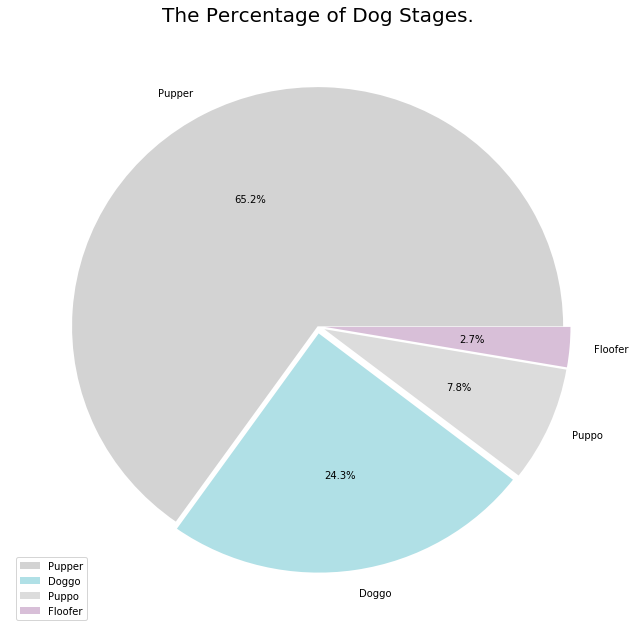

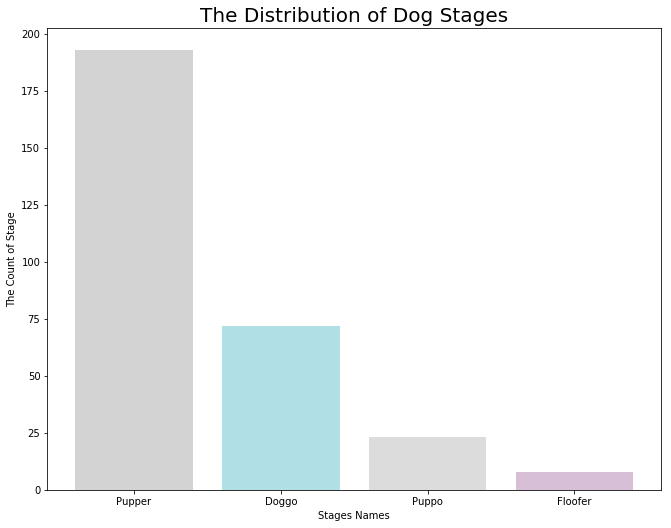

In [67]:
pielabels = ['Pupper','Doggo', 'Puppo', 'Floofer']
piecolors = ['LightGrey', 'PowderBlue','Gainsboro','Thistle']
explode   = (0.0, 0.03, 0.03, 0.03)
plt.pie(tweets[tweets.stage != "None"].stage.value_counts(), labels=pielabels, autopct='%1.1f%%', explode=explode, colors=piecolors)
plt.title('The Percentage of Dog Stages.', fontsize=20)
fig = plt.gcf()
fig.set_size_inches(11,11);
plt.legend();

locations = [1, 2, 3, 4]
heights = [tweets[tweets.stage == "pupper"].stage.count(),tweets[tweets.stage == "doggo"].stage.count(),tweets[tweets.stage == "puppo"].stage.count(),tweets[tweets.stage == "floofer"].stage.count()]

plt.figure(figsize=(11,8.5))
plt.bar(locations, heights, tick_label=pielabels, color=piecolors)
plt.title('The Distribution of Dog Stages',fontsize=20)
plt.xlabel('Stages Names');
plt.ylabel('The Count of Stage');

There a major amount of  as 82.7% of the dataframe as None. but after agnoring the None in the dog stages.


The above plots shows the Dog Stages in tweest, shows the 65.2%  are Pupper is the most rated and popular stage, and that 24.3% of the tweets dog are in the stage Doggo, and that 7.8% of the tweets dog are in the stage Puppo, and that 2.7% of the tweets dog are in the stage Floofer.

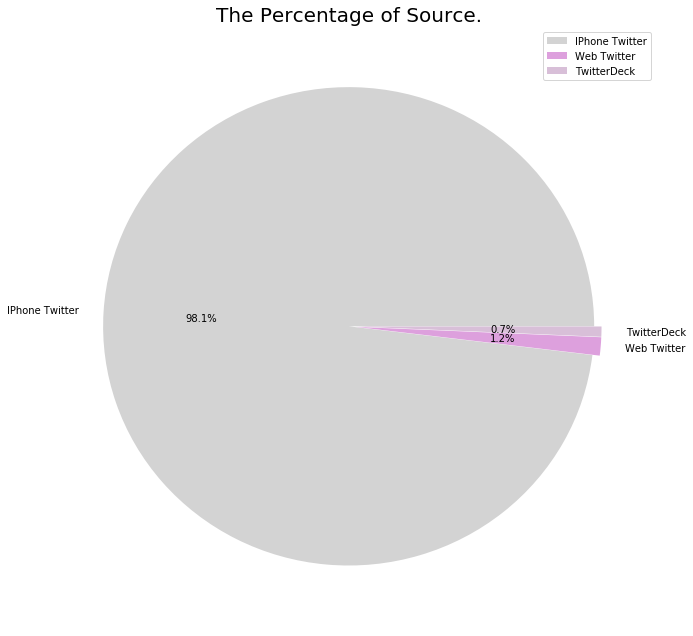

In [68]:
labels = ['IPhone Twitter','Web Twitter', 'TwitterDeck']
colors = ['LightGrey','Plum','Thistle']

explode = ( 0.0, 0.03, 0.03)
plt.pie(tweets.source.value_counts(), labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('The Percentage of Source.', fontsize=20)
fig = plt.gcf()
fig.set_size_inches(11,11);
plt.legend();


The above plot shows the source of tweest in the DataFrame, shows the 98.0%  are tweet for IPhone Twitter app, and that 1.4% of the tweets are from Web Client of Twitter, and that 0.6% of the tweets are from TweetDesk.

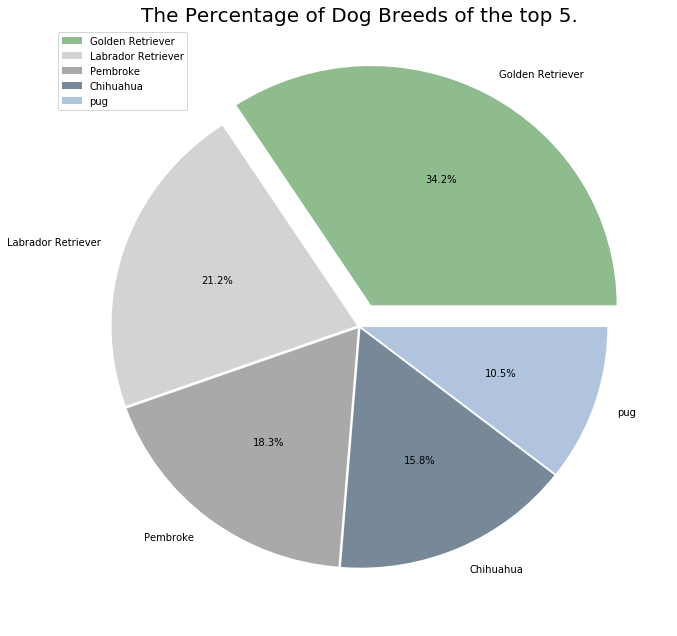

In [69]:
color=['darkseagreen', 'lightgray','darkgray','lightslategray','lightsteelblue','darkturquoise']
labels=['Golden Retriever','Labrador Retriever','Pembroke','Chihuahua','pug']
explode = (0.1,0.01,0.01,0.01,0.01)

plt.pie(tweets[tweets.p1_dog].p1.value_counts().head(5), labels = labels, autopct='%1.1f%%', explode=explode, colors=color)
plt.title('The Percentage of Dog Breeds of the top 5.', fontsize=20)
fig = plt.gcf()
fig.set_size_inches(11,11);
plt.legend();


In [70]:
tweets[tweets.p1_dog].p1.value_counts().head(5)

golden_retriever      176
Labrador_retriever    109
Pembroke               94
Chihuahua              81
pug                    54
Name: p1, dtype: int64

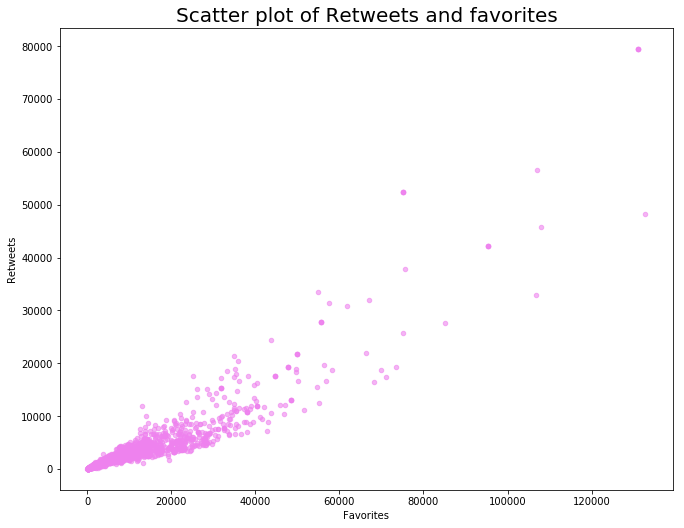

In [71]:
tweets.plot.scatter(x = 'favorite_count', y ='retweet_count' , alpha = 0.6, color ='Violet',figsize=(11,8.5))
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Scatter plot of Retweets and favorites',fontsize = 20)
plt.show()


The above map shows the strong correlation between the Favorites and Retweets

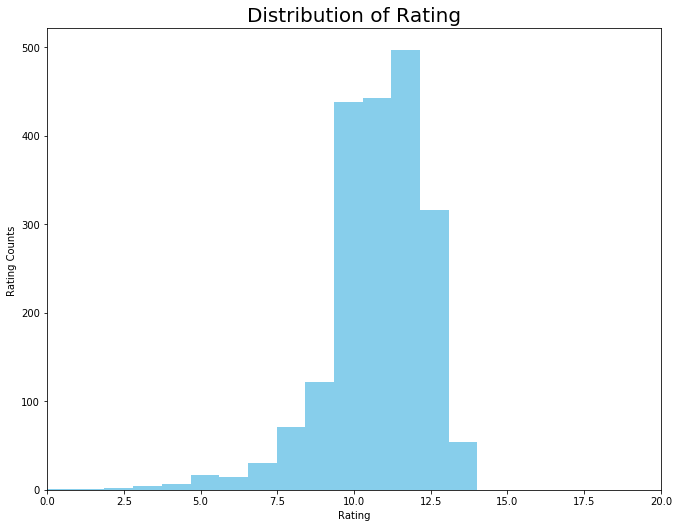

In [72]:
plt.figure(figsize = (11, 8.5))
plt.hist(tweets.rating_numerator, bins = 1900, color='SkyBlue')
plt.title('Distribution of Rating', fontsize = 20)
plt.xlabel('Rating')
plt.ylabel('Rating Counts ')
plt.xlim(0,20)
plt.show()

The above histogram show the most used rating are from the 9 to 14

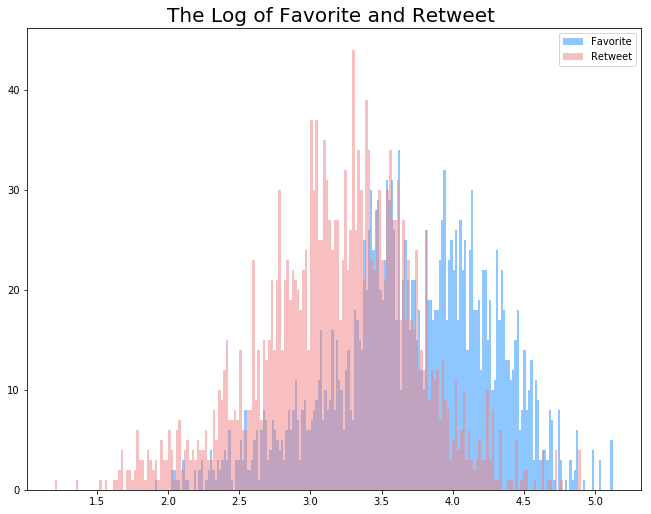

In [73]:
plt.figure(1, figsize = (11, 8.5))
log = tweets[['favorite_count', 'retweet_count']].applymap(lambda tweet: np.log10(tweet))
plt.hist(log.favorite_count, bins = 200, color = 'DodgerBlue', alpha = 0.5, label ='Favorite')
plt.hist(log.retweet_count, bins = 200, color = 'LightCoral', alpha = 0.5, label ='Retweet')
plt.legend()
plt.title('The Log of Favorite and Retweet ', fontsize = 20 )
plt.show()

The above symbolize the log transformation of Retweet and Favorite look bimodal. 

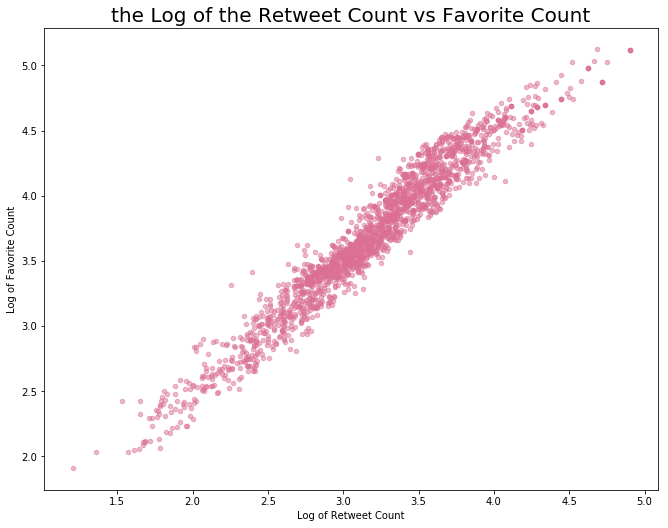

In [74]:
log.plot.scatter(x='retweet_count', y='favorite_count', alpha = 0.5, color ='PaleVioletRed',figsize=(11, 8.5))
plt.title('the Log of the Retweet Count vs Favorite Count', fontsize = 20 )
plt.xlabel('Log of Retweet Count')
plt.ylabel('Log of Favorite Count')
plt.show()

The above scatter plot shows the strong direct correlation between the Favorites and Retweets.

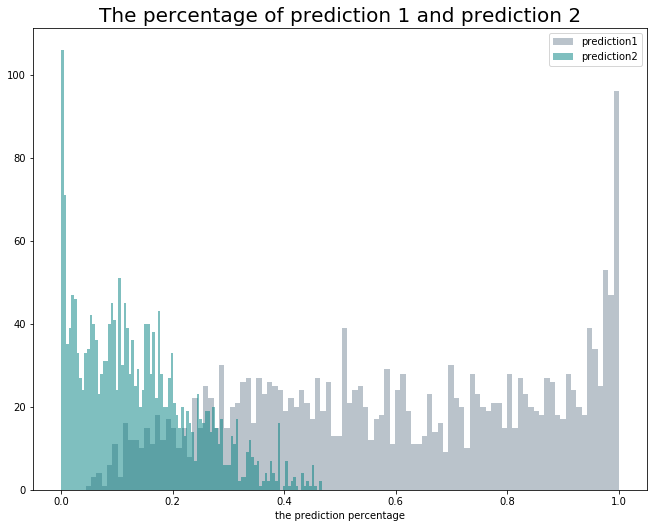

In [75]:
plt.figure(1, figsize = (11, 8.5))
plt.hist(tweets.p1_conf, bins = 100,alpha = 0.5, color='LightSlateGrey', label ='prediction1')
plt.hist(tweets.p2_conf, bins = 100,alpha = 0.5, color='Teal', label ='prediction2')
plt.legend()
plt.title('The percentage of prediction 1 and prediction 2', fontsize = 20)
plt.xlabel('the prediction percentage')
plt.show()

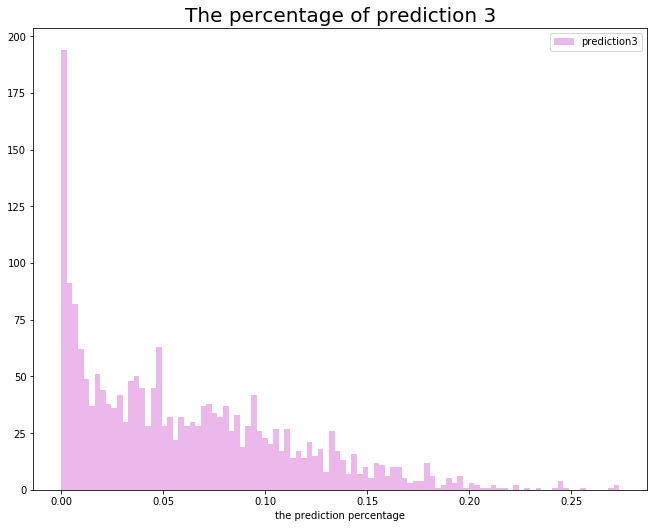

In [76]:
plt.figure(1, figsize = (11, 8.5))
plt.hist(tweets.p3_conf, bins = 100,alpha = 0.5, color='Orchid', label ='prediction3')
plt.legend()
plt.title('The percentage of prediction 3', fontsize = 20)
plt.xlabel('the prediction percentage')
plt.show()

The histogram above show all the predictions, but prediction 3 it's in separate histogram because  a very small, The prediction 1 is closer to 1.0, but prediction 2 is closer 0.0, and most likely prediction1 and prediction2 specially the highest once are for the same tweets.

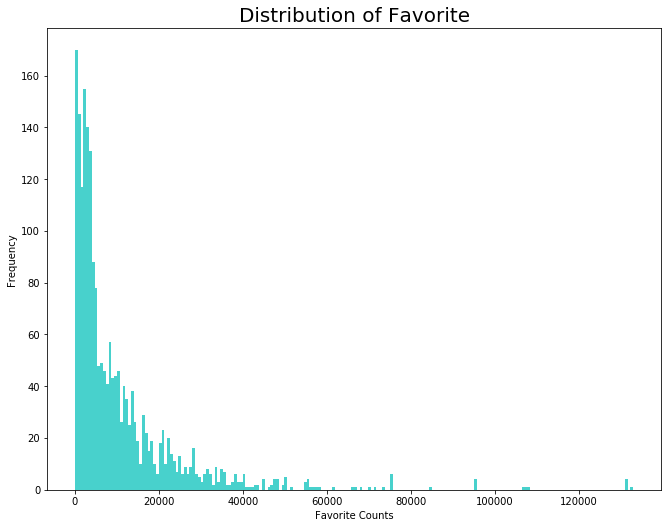

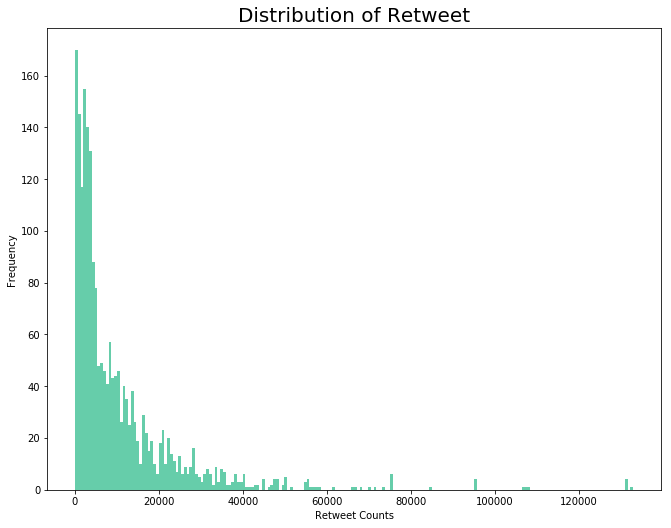

In [77]:
plt.figure(1, figsize = (11, 8.5))
plt.hist(tweets.favorite_count, bins = 200, color='MediumTurquoise')
plt.title('Distribution of Favorite', fontsize = 20 )
plt.xlabel('Favorite Counts')
plt.ylabel('Frequency')
plt.show()
plt.figure(1, figsize = (11, 8.5))
plt.hist(tweets.favorite_count, bins = 200, color='MediumAquaMarine')
plt.title('Distribution of Retweet', fontsize = 20 )
plt.xlabel('Retweet Counts')
plt.ylabel('Frequency')
plt.show()

the histogram above summarizes the similarities between the rewteet_count, and favorite_count, and most likely the tweeter the account become verified and viral on twitter. and mostly this meaning Retweet and Favorite become higher.

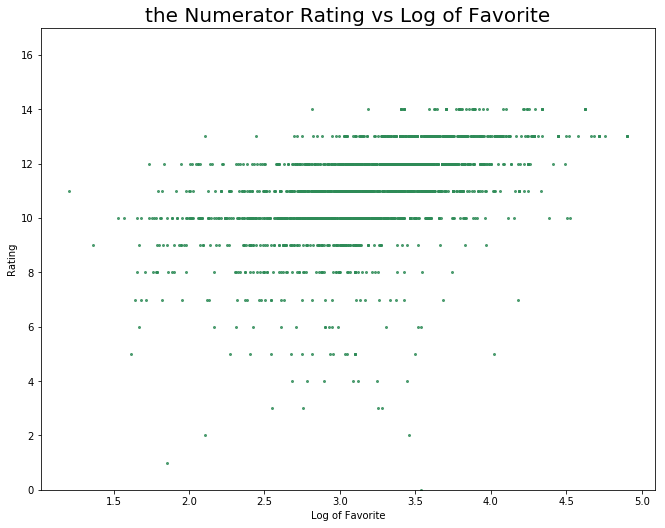

In [78]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(log.retweet_count, tweets.rating_numerator, alpha = 0.8, marker ='o', linestyle='', ms= 2, color ='SeaGreen')
plt.title('the Numerator Rating vs Log of Favorite', fontsize = 20)
plt.xlabel('Log of Favorite')
plt.ylabel('Rating')
plt.ylim(0,17)
plt.show()

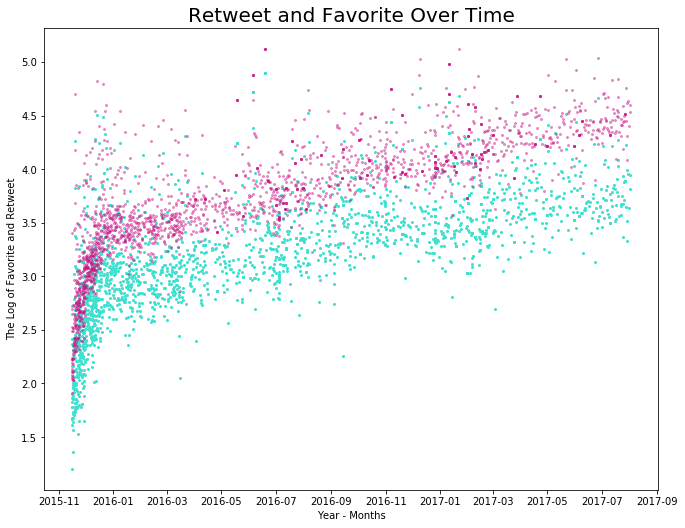

In [79]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(tweets.timestamp ,log.retweet_count, marker = 'o', linestyle = '', ms = 2,color ='Turquoise')
plt.plot(tweets.timestamp ,log.favorite_count, marker = 'o', alpha = 0.4,linestyle = '',ms = 2,color ='MediumVioletRed')
plt.title('Retweet and Favorite Over Time', fontsize = 20)
plt.xlabel('Year - Months')
plt.ylabel('The Log of Favorite and Retweet')
plt.show()

From the above scatter plot you can see how the twitter account got huge amount of retweet and likes then in small amount of time, then slowly got highr amount of retweet and likes     